In [1]:
import pandas as pd
import numpy as np
from pct.tree.heuristic.Heuristic import Heuristic5
from pct.tree.heuristic.NumericHeuristic import NumericHeuristic5
from pct.tree.splitter.splitter import Splitter
from pct.tree.tree import Tree
# from pct.tree.ftest.ftest import FTest


## From YXH's data process

In [3]:

from sklearn.preprocessing import LabelEncoder

# Load the u.data dataset
u_data = pd.read_csv('C:/Users/13447/Desktop/Stats thesis/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

# # # Perform label encoding on user_id and item_id
# user_encoder = LabelEncoder()
# item_encoder = LabelEncoder()

# u_data['user_id'] = user_encoder.fit_transform(u_data['user_id'])
# u_data['item_id'] = item_encoder.fit_transform(u_data['item_id'])

# # # Create the rating matrix
# n_users = u_data['user_id'].nunique()
# n_items = u_data['item_id'].nunique()

# Define the threshold
THRESHOLD = 3  # Ratings above this are "Lovers", below are "Haters"

# Pivot the data
rating_matrix = u_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
rating_matrix.index = u_data['user_id'].unique()  # Ensure user_id alignment
rating_matrix.columns = u_data['item_id'].unique()  # Ensure item_id alignment


# Apply threshold classification to the rating matrix (after thresholding)
rating_matrix_thresholded = np.where(rating_matrix > THRESHOLD, 1, np.where(rating_matrix > 0, -1, 0))

# Convert numpy array to pandas DataFrame for easier inspection
rating_matrix_thresholded_df = pd.DataFrame(rating_matrix_thresholded)


In [5]:
u_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
rating_matrix

,242,302,377,51,346,474,265,465,451,86,...,1594,1626,1645,1659,1682,1674,1640,1637,1630,1641
196,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## initiate tree and splitter

In [26]:
tree = Tree(min_instances=1)
tree.fit(rating_matrix, u_data['rating'], target_weights=None)




✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  135
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 135: 4
❤️ Lovers: 3
💔 Haters: 1
❓ Unknowns: 939
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  302
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 302: 1
❤️ Lovers: 0
💔 Haters: 1
❓ Unknowns: 2
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...
🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  242
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 242: 1
❤️ Lovers: 1
💔 Haters: 0
❓ Unknowns: 0
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8611610>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8611610>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8611610>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  242
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 242: 2
❤️ Lovers: 1
💔 Haters: 1
❓ Unknowns: 0
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DFA4AC0D0>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DFA4AC0D0>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DFA4AC0D0>. Stopping recursion.
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  242
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 242: 1
❤️ Lovers: 0
💔 Haters: 1
❓ Unknowns: 0
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...
🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  242
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 242: 1
❤️ Lovers: 0
💔 Haters: 1
❓ Unknowns: 0
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF80CCB90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF80CCB90>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF80CCB90>. Stopping recursion.
🌲 Building predictive clustering tree...
🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  135
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 135: 0
❤️ Lovers: 0
💔 Haters: 0
❓ Unknowns: 939
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...
🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(


🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  135
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 135: 0
❤️ Lovers: 0
💔 Haters: 0
❓ Unknowns: 939
🔄 Recursively building tree for subsets...
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8C16710>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8C16710>. Stopping recursion.
🍃 Reached max depth at node <pct.tree.node.node.Node object at 0x0000029DF8C16710>. Stopping recursion.
✅ Tree built successfully!


C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(


In [28]:
tree.print_tree_structure()

Node: 135_157
Attribute: 135
Criterion: [0.]
Leaf Node: No
Children:
    Node: 302_158
    Attribute: 302
    Criterion: [0.]
    Leaf Node: No
    Children:
        Node: leaf_159=[nan] (0.0)
        Attribute: None
        Criterion: None
        Leaf Node: No
        Children:
        Node: 242_160
        Attribute: 242
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 242_164
        Attribute: 242
        Criterion: [0.]
        Leaf Node: No
        Children:
    Node: 242_168
    Attribute: 242
    Criterion: [0.]
    Leaf Node: No
    Children:
        Node: leaf_169=[nan] (0.0)
        Attribute: None
        Criterion: None
        Leaf Node: No
        Children:
        Node: 242_170
        Attribute: 242
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: leaf_174=[nan] (0.0)
        Attribute: None
        Criterion: None
        Leaf Node: No
        Children:
    Node: 135_175
    Attribute: 135
    Criterion: [0.]


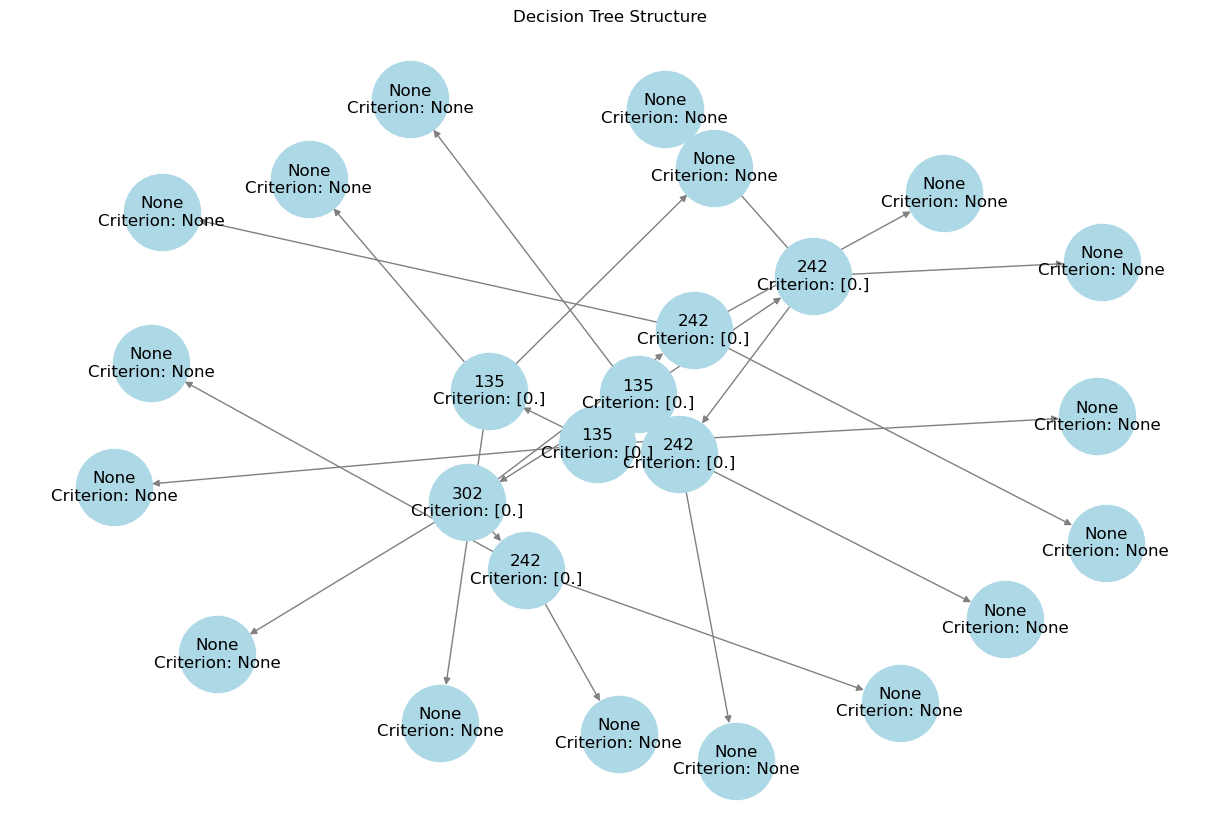

In [30]:
tree.visualize_tree()


## create rI and rU during preprocessing phase

In [ ]:

# Create rI and rU indexes for training set (R)
# rI: item to user ratings (dictionary of items with lists of user ratings)
rI = {}
for _, row in u_data.iterrows():
    item_id = row['item_id']
    user_id = row['user_id']
    rating = row['rating']
    if item_id not in rI:
        rI[item_id] = []
    rI[item_id].append((user_id, rating))

# rU: user to item ratings (dictionary of users with lists of item ratings)
rU = {}
for _, row in u_data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    if user_id not in rU:
        rU[user_id] = []
    rU[user_id].append((item_id, rating))

In [ ]:
# Optionally, print rI and rU to check the data structure for training and testing
print("\nSample rI (item to user ratings) for Training Set:")
for item in list(rI.keys())[:2]:  # Display sample item indices
    print(f"Item {item}: {rI[item]}")

print("\nSample rU (user to item ratings) for Training Set:")
for user in list(rU.keys())[:2]:  # Display sample user indices
    print(f"User {user}: {rU[user]}")

In [ ]:
# find and count users who have rated item 246 and their ratings
item_id = 55
print(f"Users who have rated item {item_id} and their ratings:")
print(rI[item_id])

# count users who have rated item 246 and their ratings
print(f"Number of users who have rated item {item_id}: {len(rI[item_id])}")

In [ ]:

print(f"Number of users who didn't rate item {item_id}:")
print(n_users - len(rI[item_id]))

In [15]:
import numpy as np
import pandas as pd


data = {
    'Item_1': [0, 4, 3, 2, 1],
    'Item_2': [3, 0, 5, 1, 0],
    'Item_3': [0, 2, 3, 4, 5],
    'Item_4': [4, 5, 1, 2, 0],
    'Item_5': [1, 3, 0, 5, 4]
}


rating_matrix_1 = pd.DataFrame(data, index=['User_1', 'User_2', 'User_3', 'User_4', 'User_5'])
print("🧐 rating matrix 1:")
print(rating_matrix_1)


🧐 rating matrix 1:
        Item_1  Item_2  Item_3  Item_4  Item_5
User_1       0       3       0       4       1
User_2       4       0       2       5       3
User_3       3       5       3       1       0
User_4       2       1       4       2       5
User_5       1       0       5       0       4


In [23]:
rating_matrix_1 = np.array(rating_matrix_1, dtype=float)

tree1 = Tree(min_instances=1)


tree1.fit(rating_matrix_1,rating_matrix_1, target_weights=None)




✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...
Item ID:  0 Total Error:  [2.]
Item ID:  1 Total Error:  [2.]
Item ID:  2 Total Error:  [1.]
Item ID:  3 Total Error:  [1.]
Item ID:  4 Total Error:  [2.5]
🔍 Best item for splitting:  2
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 2: 4
❤️ Lovers: 2
💔 Haters: 2
❓ Unknowns: 1
🔄 Recursively building tree for subsets...
🌲 Building predictive clustering tree...
Item ID:  0 Total Error:  [0.5]
Item ID:  1 Total Error:  [0.]
Item ID:  2 Total Error:  [0.5]
Item ID:  3 Total Error:  [0.]
Item ID:  4 Total Error:  [0.5]
🔍 Best item for splitting:  1
Type of x: <class 'pandas.core.frame.DataFrame'>
👥 Users who rated item 1: 1
❤️ Lovers: 0
💔 Haters: 1
❓ Unknowns: 1
🔄 Recursively building tree for subsets...
🌲 Building predictive 

C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\13447\Desktop\pct_test(2)\pct_test\pct\pct\tree\node\node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
C:\Users\13447\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will r

In [25]:
from pct.tree.heuristic.Heuristic import Heuristic5
from pct.tree.heuristic.NumericHeuristic import NumericHeuristic5
# Assume other parameters
weights = np.array([1, 1, 1])  # Weight for each instance
min_instances = 1
ftest = None  # Can be left as None, or implement F-test as needed
instance_weights = np.ones_like(weights)  # Weight for each instance
threshold = 4  # Threshold for Lovers' ratings




# Create heuristic object
heuristic = NumericHeuristic5(
    name="Numeric Heuristic",
    weights=weights,
    min_instances=min_instances,
    instance_weights=instance_weights,
    x=rating_matrix_1,
    y=rating_matrix_1
)


# Compute total statistics and group statistics
sum_t, sum2_t, n_t = heuristic.compute_statistics()  # Total statistics
sum_L, sum2_L, n_L, sum_H, sum2_H, n_H, sum_U, sum2_U, n_U = heuristic.compute_statistics_for_groups()
e_L, e_H, e_U = heuristic.squared_error() 

# Output the results for verification
print(f"Total Statistics: sum_t={sum_t}, sum2_t={sum2_t}, n_t={n_t}")
print(f"Lovers Group: sum_L={sum_L}, sum2_L={sum2_L}, n_L={n_L}")
print(f"Haters Group: sum_H={sum_H}, sum2_H={sum2_H}, n_H={n_H}")
print(f"Unknowns Group: sum_U={sum_U}, sum2_U={sum2_U}, n_U={n_U}")


print(f"Lovers Group: e_L={e_L}")
print(f"Haters Group: e_H={e_H}")
print(f"Unknowns Group: e_U={e_U}")


# Compute and print squared error
squared_error = heuristic.squared_error_total()
print(f"Squared Error: {squared_error}")

Total Statistics: sum_t=[10.  9. 14. 12. 13.], sum2_t=[30. 35. 54. 46. 51.], n_t=[5 5 5 5 5]
Lovers Group: sum_L=[4. 5. 9. 9. 9.], sum2_L=[16. 25. 41. 41. 41.], n_L=[1 1 2 2 2]
Haters Group: sum_H=[6. 4. 5. 3. 4.], sum2_H=[14. 10. 13.  5. 10.], n_H=[3 2 2 2 2]
Unknowns Group: sum_U=[0. 0. 0. 0. 0.], sum2_U=[0. 0. 0. 0. 0.], n_U=[1 2 1 1 1]
Lovers Group: e_L=[0.  0.  0.5 0.5 0.5]
Haters Group: e_H=[2.  2.  0.5 0.5 2. ]
Unknowns Group: e_U=[0. 0. 0. 0. 0.]
Squared Error: [2.  2.  1.  1.  2.5]


In [27]:
tree1.print_tree_structure()

Node: 2_82
Attribute: 2
Criterion: [1.]
Leaf Node: No
Children:
    Node: 1_83
    Attribute: 1
    Criterion: [0.]
    Leaf Node: No
    Children:
        Node: leaf_84=[nan nan nan nan nan] (0.0)
        Attribute: None
        Criterion: None
        Leaf Node: No
        Children:
        Node: 0_85
        Attribute: 0
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 0_89
        Attribute: 0
        Criterion: [0.]
        Leaf Node: No
        Children:
    Node: 0_93
    Attribute: 0
    Criterion: [0.]
    Leaf Node: No
    Children:
        Node: 0_94
        Attribute: 0
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 0_98
        Attribute: 0
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: leaf_102=[nan nan nan nan nan] (0.0)
        Attribute: None
        Criterion: None
        Leaf Node: No
        Children:
    Node: 0_103
    Attribute: 0
    Criterion: [0.]
    Leaf Node: No
    